# Setting up Tensorflow GPU on local system

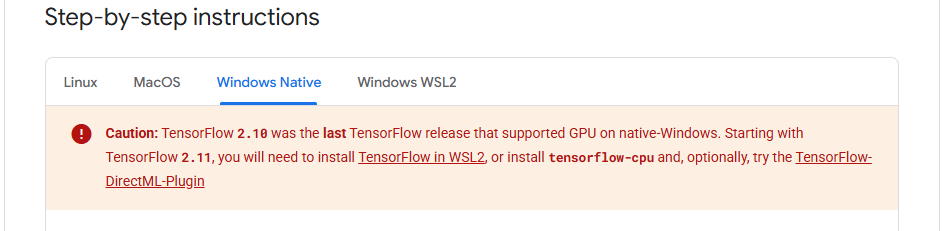

### Since Tensorflow officially stopped the support of Windows Native, we will be first installing WSL on Windows (11.0) 
    Step 1 : install WSL on Windows (Open PowerShell as Administrator)
                Run: wsl --install
                This installs: WSL
                               WSL2
                               Ubuntu (default Linux distro)

                Restart Windows when prompted
                After restart, verify:
                                       wsl --status
                                       wsl --list --verbose
                Ensure: Default Version: 2

    Step 2: Open Ubuntu WSL Terminal
            Press Windows key
            Search Ubuntu
            Click Ubuntu

    Step3: sudo apt update && sudo apt upgrade -y

    Step 4 (Optional): First check with nvidia-smi
                        Download nvidia-latest drivers and reboot the sytem (install game ready drivers)
                        https://www.nvidia.com/en-us/drivers/details/259272/
    Step 5: Install Anaconda
                wget https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
            verify the file downloaded
                ls -lh Anaconda3-2024.06-1-Linux-x86_64.sh
            Run the installer (NO sudo)
                bash Anaconda3-2024.06-1-Linux-x86_64.sh  -- keep pressing enter
            verify anaconda after installation
                ls ~/anaconda3
                ~/anaconda3/bin/conda --version
                ~/anaconda3/bin/conda init bash
                conda --version
            create new environment
                1. conda create -n tf-gpu python=3.10 -y
                2. pip install --upgrade pip
                3. conda install -c nvidia cuda-toolkit=12.3 cudnn=8.9 -y 
                4. pip install tensorflow[and-cuda]

#### Optional steps
echo 'export LD_LIBRARY_PATH=$CONDA_PREFIX/lib:$LD_LIBRARY_PATH' >> ~/.bashrc
source ~/.bashrc

echo 'export PATH=/usr/local/cuda/bin:$PATH' >> ~/.bashrc
PREFIX=/home/abhishekmaity97/anaconda3
    
    

In [1]:
import tensorflow as tf

2026-01-02 06:00:28.777157: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(f">>>>>>{tf.test.gpu_device_name()}")
print(f">>>>>>{tf.test.is_gpu_available()}")
print(f">>>>>>{tf.test.is_built_with_cuda()}")
print(f">>>>>>{tf.test.is_built_with_gpu_support()}")
print(f">>>>>>{tf.config.list_physical_devices('GPU')}")

>>>>>>/device:GPU:0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
>>>>>>True
>>>>>>True
>>>>>>True
>>>>>>[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1767333631.872997    6109 gpu_device.cc:2020] Created device /device:GPU:0 with 2240 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
I0000 00:00:1767333631.876767    6109 gpu_device.cc:2020] Created device /device:GPU:0 with 2240 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [4]:
import pandas as pd